In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the dataset
dataset  = pd.read_csv('https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/KMeans.csv')
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
# Keep the columns 'Annual Income (k$)' and 'Spending Score (1-100)'
x = dataset.iloc[:,[1,2]].values

In [5]:
# Import DBSCAN and StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
# Standardize the dataset
x = StandardScaler().fit_transform(x)

In [7]:
# Initialize DBSCAN
db = DBSCAN(eps = 0.3, min_samples=6).fit(x)
label = db.labels_
label

array([ 1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  5,  3,  5,  3,  5, -1,
        5,  3,  5,  3,  5, -1,  5,  3,  5, -1, -1, -1,  5, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [8]:
# Display the labels
set(db.labels_)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5)}

In [9]:
# Display the core indices
core_points = db.core_sample_indices_
core_points

array([  3,   5,   9,  13,  15,  16,  21,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 125, 126, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 147, 149,
       151, 153, 154, 155, 157, 159, 161, 163, 165, 166, 170, 174, 176,
       178])

In [10]:
# Display the Noise points indices
noise_points = np.where(label == -1)[0]
noise_points

array([  2,   6,   7,   8,  10,  11,  12,  14,  19,  22,  24,  25,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  41,  44,
       169, 175, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [11]:
# Display the Border points indices
border_points = np.setdiff1d(np.where(label != -1)[0], core_points)
border_points

array([  0,   1,   4,  17,  18,  20,  23,  26,  31,  40,  42,  43,  45,
       123, 124, 127, 142, 145, 146, 148, 150, 152, 156, 158, 160, 162,
       164, 167, 168, 171, 172, 173, 177, 182])

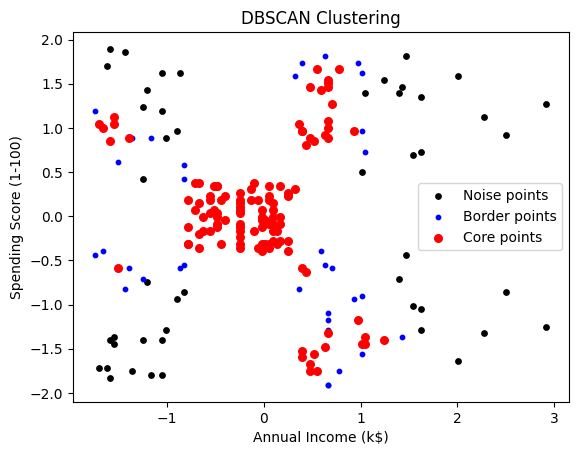

In [12]:
# Visualize the points in following categories:
# 1. Noise points: as black color
# 2. All cluster points: as different colors
# 2a. Core point size > Border point size

plt.scatter(x[noise_points,0],  x[noise_points,1],  color = 'black',  label = 'Noise points',   s=15)
plt.scatter(x[border_points,0], x[border_points,1], color = 'blue', label = 'Border points',  s=10)
plt.scatter(x[core_points,0],   x[core_points,1],   color = 'red',    label = 'Core points',    s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/tmp/ipython-input-338747576.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', max(1, len(cluster_labels)))


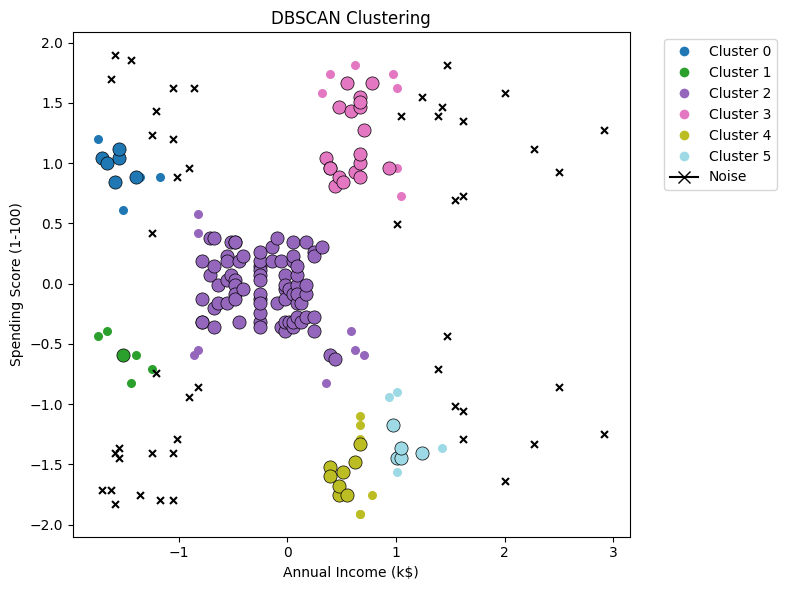

In [13]:
from matplotlib.lines import Line2D

unique_labels = sorted(set(label))
cluster_labels = [lab for lab in unique_labels if lab != -1]
cmap = plt.cm.get_cmap('tab20', max(1, len(cluster_labels)))

plt.figure(figsize=(8, 6))
handles = []

for i, lab in enumerate(cluster_labels):
    color = cmap(i % cmap.N)
    is_core = (label == lab) & np.isin(np.arange(len(label)), core_points)
    is_border = (label == lab) & (~is_core)

    if np.any(is_border):
        plt.scatter(x[is_border, 0], x[is_border, 1], c=[color], s=30, marker='o')
    if np.any(is_core):
        plt.scatter(x[is_core, 0],  x[is_core, 1],  c=[color], s=90, marker='o',
                    edgecolors='k', linewidths=0.5)

    handles.append(Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=8, label=f'Cluster {lab}'))

if noise_points.size:
    plt.scatter(x[noise_points, 0], x[noise_points, 1], c='k', s=25, marker='x')
    handles.append(Line2D([0], [0], marker='x', color='k', markersize=8, label='Noise'))

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()